# Ames House Price Data - Data Cleaning

> Juptyer notebook, running a Julia 0.5.2 kernel, with the help of Machine Learning modules written by the author

*This notebook describes cleaning of the data. Additional model-dependent transformations to the data (eg, Cox-Box transformations and one-hot encodings for linear models) are described in the notebook for the relevant model.*

## Reviewing data types

Some of our models are able to handle categorical and ordinal data simultaneously. These models will expect categorical data to be of `String` or `Char` type. In the house price data the attribute `MSSubClass` (building class) is categorical but is represented by an `Int` datatype. We fix this now, after loading the data:

In [39]:
push!(LOAD_PATH, pwd()) # Allow loading of modules from current directory 
using DataFrames 
using Preprocess # from current directory

train = readtable("0.kaggle/train.csv")
test = readtable("0.kaggle/test.csv")
combined = vcat(train,test)
head(combined)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,x1stFlrSF,x2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,x3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1,1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NA,NA,NA,0,2,2008,WD,Normal,208500
2,2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NA,NA,NA,0,5,2007,WD,Normal,181500
3,3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NA,NA,NA,0,9,2008,WD,Normal,223500
4,4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
5,5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NA,NA,NA,0,12,2008,WD,Normal,250000
6,6,50,RL,85,14115,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NA,Attchd,1993,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NA,MnPrv,Shed,700,10,2009,WD,Normal,143000


In [40]:
combined[:MSSubClass] = map(combined[:MSSubClass]) do x
    string("__", x)
end
combined[:MSSubClass]  = convert(DataArrays.DataArray{String,1}, combined[:MSSubClass]);

N.B. Alternatively, we could have reviewed the datatypes using the interactive function `review_ordinals!`.

## Appraising the quality of the data
The third column in the data frame constructed below shows the number of NA's in each field. Other columns give an idea of how they are distributed within the data. This information guides subsequent cleaning below. The various fields are described further [here](0.kaggle/data_summary.md). (To see the full list of field meta data, remove the second line below.)

In [41]:
meta = get_meta(combined)
head(meta)

,field,type,n_values,n_nas,percent_nas,row_of_first_non_na,nas_after_first_non_na
1,Id,Int64,2919,0,0.0,1,0
2,MSSubClass,String,16,0,0.0,1,0
3,MSZoning,String,6,4,0.1,1,4
4,LotFrontage,Int64,129,486,16.6,1,486
5,LotArea,Int64,1951,0,0.0,1,0
6,Street,String,2,0,0.0,1,0


## Determining outliers

The following plot reveals two properties with huge living area but sale prices around the median value. 


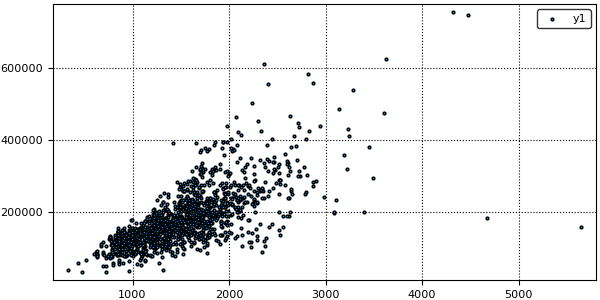

In [42]:
using Plots
pyplot(size=(600,300))

scatter(train[:GrLivArea], train[:SalePrice], markersize=2.0)

In [43]:
median(train[:SalePrice])

163000.0

We remove these from the data and record the new size of our combined data set (`Id=1461` is the first pattern in the test portion of the data):

In [44]:
mask_bad = (combined[:GrLivArea] .> 4000) .* (combined[:Id] .< 1461)
mask_good = !mask_bad
combined = combined[mask_good,:]

nrows, ncols = size(combined)

(2915,81)

## Cleaning

According to the [documentation](0.kaggle/detailed_documentation.txt), "NA" in `:Alley` means "no access" not "unknown value". Correct this:

In [45]:
combined[:Alley] = convert(Array, combined[:Alley], "NoAccess");

Similar remarks apply to other fields:

In [46]:
combined[:PoolQC] = convert(Array, combined[:PoolQC], "None")
combined[:MiscFeature] = convert(Array, combined[:MiscFeature], "None")
combined[:Fence] = convert(Array, combined[:Fence], "None")
combined[:FireplaceQu] = convert(Array, combined[:FireplaceQu], "None")
combined[:Functional] = convert(Array, combined[:Functional], "Typ");

We dump ordinal fields with more than 50% NAs. (Note that `.*` is broadcast version of logical AND.)

In [47]:
bad_fields = meta[(meta[:percent_nas] .> 50) .* (meta[:type] .!= String), :field]
bad_fields = collect(bad_fields)
filter!(x -> x != :SalePrice, bad_fields) # exclude target variable which is undefined in test portion of data
delete!(combined, bad_fields);

Dump categorical fields with more than 80% NAs:

In [48]:
bad_fields = meta[(meta[:percent_nas] .> 80) .* (meta[:type] .== String), :field]
delete!(combined, bad_fields);

Make "NA" a genuine value in remaining categoricals:

In [49]:
for f in names(combined)
    if eltype(combined[f]) == String
        combined[f] = convert(Array{String,1}, combined[f], "_NA")
    end
end

To clean `LotFrontage` we shall suppose that, within each neighborhood,  `:LotFrontage` (which is measured in linear feet) correlates roughly with the *square root* of `:LotArea` (measured in square feet). So  letting `ratio` refers to `:LotFrontage/sqrt(:LotArea)` we begin by finding the median value of `ratio` in each neighborhood and storing this in a dictionary:

In [50]:
temp = by(combined, [:Neighborhood], df -> median(dropna(df[:LotFrontage]./sqrt(df[:LotArea]))))
ratio = Dict{String,Float64}()
for i in 1:first(size(temp))
    ratio[temp[i,:Neighborhood]]=temp[i,:x1]
end

We now use this ratio to imputate NA values in `:LotFrontage`:

In [51]:
combined[:LotFrontage] =  convert(DataArray{Float64,1}, combined[:LotFrontage])
for i in 1:nrows
    if isna(combined[i,:LotFrontage])
        combined[i,:LotFrontage] = ratio[combined[i,:Neighborhood]]*sqrt(combined[i,:LotArea])
    end
end

Drop `:Utilities` as the field is virtually constant:

In [52]:
delete!(combined, :Utilities);

We replace `MasVnrArea` (Masonry Veneer area) NAs with zeros:

In [53]:
combined[:MasVnrArea] = convert(Array, combined[:MasVnrArea], 0.0);

Remaining NAs are replaced with median values:

In [54]:
meta = get_meta(combined)
fields_to_fix = collect(meta[meta[:n_nas] .> 0,:][:field])
filter!(x -> x != :SalePrice, fields_to_fix) # exclude target variable
for f in fields_to_fix
    m = median(dropna(combined[f]))
    combined[f] = convert(Array{Float64, 1}, combined[f], m)
end

It turns out `:MSSubClass` takes on a value in the test set not appearing
in the train set. We replace it with the mode value:

In [55]:
combined[:MSSubClass] = map(combined[:MSSubClass]) do x 
    x == "_150" ? "_20" : x
end;

## Transforming the target variable
As we shall be optimizing our models to minimize log-root-mean-squared error, it is convenient to replace the target variable in our modelling, `:SalePrice`, with its logarithm:

In [56]:
combined[:target] = log(combined[:SalePrice])
delete!(combined, :SalePrice);

## Saving the cleaned data to file

In [57]:
train = combined[!isna(combined[:target]),:]
test = combined[isna(combined[:target]),:]
    
writetable("2.cleaned/combined.csv", combined)
writetable("2.cleaned/train.csv", train)
writetable("2.cleaned/test.csv", test)